In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_excel('Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
## number of products
num_products = len(df['Product ID'].value_counts())
print(num_products)

1862


In [5]:
## number of customers
num_customers = len(df['Customer ID'].value_counts())
print(num_customers)

793


In [6]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [7]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [10]:
df['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [11]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.loc[df.duplicated()]  ## No duplicates

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [14]:
## remove redudant column Row ID and only one country US
df.drop(['Row ID', 'Country'], axis = 1, inplace = True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
## Create a column to see which items were profitable or not
df['Profitable'] = np.where(df['Profit'] > 0, 'Yes', 'No')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Yes
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Yes
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Yes
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Yes


In [16]:
## sort the data by Order date

df = df.sort_values('Order Date')
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable
7980,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Yes
739,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,Yes
740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,No
741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,No
1759,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,No
908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,Yes
907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,Yes
1296,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,Yes


In [17]:
df.reset_index(drop=True, inplace = True)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Yes
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,Yes
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,No
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,No
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,No
9990,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,Yes
9991,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,Yes
9992,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,Yes


#### Time frame of data set is from Jan 2014 to Dec 2017



In [18]:
df['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [19]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [20]:
df['Order Date'][0]

Timestamp('2014-01-03 00:00:00')

In [21]:
## For each order
## Add columns day of week, time in days from order to shipment

df['Week Day'] = df['Order Date'].dt.dayofweek
df['Days to Ship'] = df['Ship Date'] - df['Order Date']

In [22]:
df[['Order Date', 'Ship Date', 'Week Day', 'Days to Ship']].head()

,Order Date,Ship Date,Week Day,Days to Ship
0,2014-01-03,2014-01-07,4,4 days
1,2014-01-04,2014-01-08,5,4 days
2,2014-01-04,2014-01-08,5,4 days
3,2014-01-04,2014-01-08,5,4 days
4,2014-01-05,2014-01-12,6,7 days


In [23]:
## get rid of 'days' in days to ship columns

df['Days to Ship'] = df['Days to Ship'].dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable,Week Day,Days to Ship
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Yes,4,4
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,Yes,5,4
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,No,5,4
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,No,5,4
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,Yes,6,7


In [24]:
## change day of the week column to something more descriptive

conditions = [(df['Week Day'] == 0), 
              (df['Week Day'] == 1),
              (df['Week Day'] == 2), 
              (df['Week Day'] == 3),
              (df['Week Day'] == 4),
              (df['Week Day'] == 5),
              (df['Week Day'] == 6)]

# define the outcome/value to be descriptive days of the week

outcome = ['Mon', 'Tue', 'Wed', "Thur", "Fri", "Sat", "Sun"]

df['Day of Week'] = np.select(conditions, outcome, default = 'Unknown')

# check changes

df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitable,Week Day,Days to Ship,Day of Week
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,...,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Yes,4,4,Fri
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Labels,Avery 508,11.784,3,0.2,4.2717,Yes,5,4,Sat
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,No,5,4,Sat
3,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,No,5,4,Sat
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,...,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,Yes,6,7,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,80538,...,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,No,5,4,Sat
9990,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,...,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,Yes,5,4,Sat
9991,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,...,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,Yes,5,4,Sat
9992,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,Yes,5,4,Sat


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [26]:
## how many products were not profitable

df.loc[df['Profitable'] == "No"].value_counts().sum()

1936

#### Out of 9993 products sold 1593 lost money

In [27]:
## lets look some comparisons

## number of products that were profitable by region

pd.crosstab(df['Region'], df['Profitable'])

Profitable,No,Yes
Region,,
Central,752,1571
East,572,2276
South,272,1348
West,340,2863


In [28]:
pd.crosstab(df['Region'], df['Ship Mode'])

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,299,120,465,1439
East,490,155,530,1673
South,234,83,329,974
West,515,185,621,1882


In [29]:
pd.crosstab(df['Region'], df['Segment'])

Segment,Consumer,Corporate,Home Office
Region,,,
Central,1212,673,438
East,1469,877,502
South,838,510,272
West,1672,960,571


In [30]:
pd.crosstab(df['Region'], df['Category'])

Category,Furniture,Office Supplies,Technology
Region,,,
Central,481,1422,420
East,601,1712,535
South,332,995,293
West,707,1897,599


In [31]:
pd.crosstab(df['Category'], df['Segment'])

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,1113,646,362
Office Supplies,3127,1820,1079
Technology,951,554,342


In [32]:
pd.crosstab(df['Category'], df['Profitable'])

Profitable,No,Yes
Category,,
Furniture,747,1374
Office Supplies,915,5111
Technology,274,1573


In [33]:
pd.crosstab(df['Segment'], df['Profitable'])

Profitable,No,Yes
Segment,,
Consumer,1038,4153
Corporate,573,2447
Home Office,325,1458


In [34]:
df['Profit'].groupby(df["Segment"]).mean().sort_values(ascending = False)

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64

In [35]:
df['Sales'].groupby(df["Segment"]).mean().sort_values(ascending = False)

Segment
Home Office    240.972041
Corporate      233.823300
Consumer       223.733644
Name: Sales, dtype: float64

In [36]:
df['Sales'].groupby(df["Category"]).mean().sort_values(ascending = False)

Category
Technology         452.709276
Furniture          349.834887
Office Supplies    119.324101
Name: Sales, dtype: float64

In [37]:
df['Profit'].groupby(df["Category"]).mean().sort_values(ascending = False)

Category
Technology         78.752002
Office Supplies    20.327050
Furniture           8.699327
Name: Profit, dtype: float64

In [38]:
df['Sales'].groupby(df["Region"]).mean().sort_values(ascending = False)

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64

In [39]:
df['Profit'].groupby(df["Region"]).mean().sort_values(ascending = False)

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64

In [40]:
df['Sales'].groupby(df["Day of Week"]).mean().sort_values(ascending = False)

Day of Week
Tue     259.683094
Wed     237.350337
Fri     235.254268
Mon     229.255914
Sun     225.353127
Thur    220.072302
Sat     216.304944
Name: Sales, dtype: float64

In [41]:
df['Profit'].groupby(df["Day of Week"]).mean().sort_values(ascending = False)

Day of Week
Wed     39.633075
Sun     33.409071
Tue     32.161238
Mon     27.531328
Thur    27.124915
Fri     25.589012
Sat     24.941160
Name: Profit, dtype: float64

In [42]:
df['Profit'].groupby(df["Days to Ship"]).mean().sort_values(ascending = False)

Days to Ship
2    39.818676
7    32.740494
0    29.645411
6    27.660821
5    27.078471
3    26.742208
4    25.643394
1    20.436929
Name: Profit, dtype: float64

##### Lets see if there are any outliers
But before we decide which test to use z-score or IQR, Lets see which way the dataset is skewed

In [43]:
cols = ['Sales', 'Quantity', 'Discount', 'Profit']

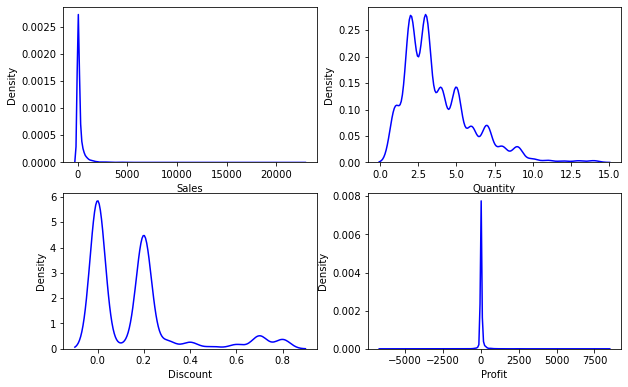

In [133]:
plt.figure(figsize=(10,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], shade = False, color = "blue")
    

plt.savefig('Graphs.png',dpi=400)


#### Looks like dataset as quite a few outliers
What if we take a log of the Sales

In [45]:
df_log = df.copy()

In [46]:
df_log['Sales'] = np.log(1 + df_log['Sales'])

In [47]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [48]:
df_log['Sales'].describe()

count    9994.000000
mean        4.156119
std         1.589793
min         0.367417
25%         2.905808
50%         4.016203
75%         5.351574
max        10.027451
Name: Sales, dtype: float64

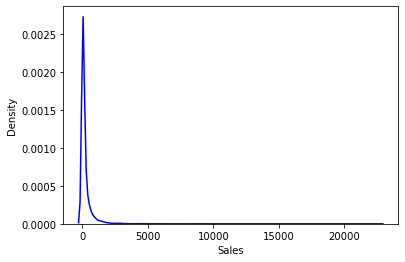

In [134]:
sns.kdeplot(df['Sales'], shade = False, color = "blue")
plt.savefig('Sales.Graph.png',dpi=400)

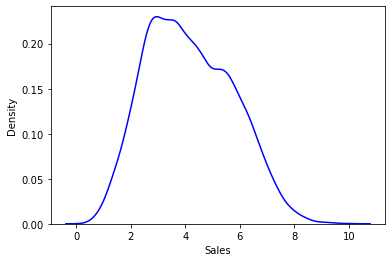

In [135]:
sns.kdeplot(df_log['Sales'], shade = False, color = "blue")
plt.savefig('Sales.Graph.png',dpi=400)

### This looks better. Maybe we can do analysis on both dataframes

In [51]:
### Detect and remove ouliers with IQR

dfq = df.copy()

In [52]:
dfq.shape

(9994, 23)

In [53]:
## function excepts a list and return array of outliers

def outliers_iqr(x_list):
    q1, q3 = np.percentile(x_list, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return dfq.loc[(x_list > upper_bound) | (x_list < lower_bound)].index

In [54]:
iqr_outliers = outliers_iqr(dfq['Sales'])

print(iqr_outliers)

Int64Index([   6,    7,   10,   21,   25,   28,   31,   51,   59,  102,
            ...
            9886, 9894, 9895, 9916, 9924, 9925, 9931, 9952, 9960, 9977],
           dtype='int64', length=1167)


### 1167 Sales outliers with IQR method

In [55]:
dfq = dfq.drop(iqr_outliers)

In [56]:
dfq.shape

(8827, 23)

In [57]:
iqr_outliers = outliers_iqr(dfq['Profit'])
print(iqr_outliers)

Int64Index([   2,    9,   14,   32,   33,   36,   42,   46,   58,   65,
            ...
            9933, 9941, 9944, 9955, 9963, 9978, 9979, 9981, 9985, 9988],
           dtype='int64', length=1435)


### 1435 Profit outliers with IQR method

In [58]:
dfq = dfq.drop(iqr_outliers)
dfq.shape

(7392, 23)

In [59]:
iqr_outliers = outliers_iqr(dfq['Discount'])
print(iqr_outliers)

Int64Index([   3,   15,   24,   37,   39,   80,   91,  110,  111,  114,
            ...
            9869, 9891, 9897, 9940, 9949, 9953, 9958, 9959, 9970, 9974],
           dtype='int64', length=613)


### 613 Discount outliers with IQR method

In [60]:
dfq = dfq.drop(iqr_outliers)
dfq.shape

(6779, 23)

In [61]:
iqr_outliers = outliers_iqr(dfq['Quantity'])
print(iqr_outliers)

Int64Index([  67,  112,  172,  179,  198,  358,  360,  374,  570,  651,  810,
             826,  945, 1115, 1195, 1226, 1269, 1291, 1391, 1405, 1540, 1780,
            2342, 2483, 2561, 2581, 2703, 2855, 2931, 3171, 3508, 3533, 3690,
            4123, 4781, 4826, 4883, 5136, 5233, 5309, 5398, 5718, 5800, 5821,
            5976, 6097, 6182, 6196, 6470, 6522, 6547, 6704, 7185, 7291, 7554,
            7832, 8142, 8491, 8542, 8776, 8795, 8850, 8880, 8947, 9002, 9086,
            9144, 9300, 9395, 9559, 9633, 9791, 9942],
           dtype='int64')


In [62]:
len(iqr_outliers)

73

In [63]:
### 73 Quantity outliers with IQR method

In [64]:
dfq = dfq.drop(iqr_outliers)
dfq.shape

(6706, 23)

### From 9993 orders, 3287 were outliers with IQR. That is quite a lot

### Lets see how z_score does

In [65]:
dfz = df.copy()

dfz[['zscore_sales', 'zscore_quantity', 'zscore_discount', 'zscore_profit']] = np.abs(stats.zscore(dfz[['Sales', 'Quantity', 'Discount', 'Profit']]))

dfz.shape                                                                                                       

(9994, 27)

In [66]:
z_outliers = dfz.loc[dfz["zscore_sales"] > 3].index
print(z_outliers)

Int64Index([   6,  212,  234,  312,  492,  611,  792,  797, 1032, 1063,
            ...
            8986, 8992, 9075, 9092, 9127, 9276, 9334, 9360, 9590, 9924],
           dtype='int64', length=127)


#### Compared to IQR there are only 127 Sales outliers with z_score

In [67]:
dfz = dfz.drop(z_outliers)
dfz.shape

(9867, 27)

In [68]:
z_outliers = dfz.loc[dfz["zscore_quantity"] > 3].index
print(z_outliers)

Int64Index([  67,  112,  172,  179,  355,  358,  360,  374,  522,  651,
            ...
            9277, 9445, 9459, 9508, 9509, 9559, 9677, 9791, 9842, 9942],
           dtype='int64', length=106)


### 106 quantity outliers with z_score > 3

In [69]:
dfz = dfz.drop(z_outliers)
dfz.shape

(9761, 27)

In [70]:
z_outliers = dfz.loc[dfz["zscore_discount"] > 3].index
print(z_outliers)

Int64Index([   3,   15,   91,  110,  111,  118,  121,  141,  280,  460,
            ...
            9703, 9764, 9827, 9891, 9897, 9909, 9928, 9933, 9949, 9959],
           dtype='int64', length=297)


### 297 discount outliers with z_score > 3

In [71]:
dfz = dfz.drop(z_outliers)
dfz.shape

(9464, 27)

In [72]:
z_outliers = dfz.loc[dfz["zscore_profit"] > 3].index
print(z_outliers)

Int64Index([ 981, 1394, 1510, 1932, 1990, 1993, 3174, 3493, 3817, 3951, 4027,
            4571, 5204, 5447, 5560, 5796, 5867, 6566, 6604, 7889, 8174, 8336,
            8355, 8411, 8816, 8927, 8939, 9285],
           dtype='int64')


In [73]:
len(z_outliers)

28

### 28 profit outliers with z_score > 3

In [74]:
dfz = dfz.drop(z_outliers)
dfz.shape

(9436, 27)

### From 9993 orders, 557 orders were outliers and were removed
Lets use the z_score outliers removed dataframe dfz for analysis

In [75]:
dfz.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Week Day,Days to Ship,zscore_sales,zscore_quantity,zscore_discount,zscore_profit
Postal Code,1.000000,0.008985,0.014547,0.009816,-0.014412,0.002345,-0.007435,0.000066,-0.001516,-0.111822,-0.051327
Sales,0.008985,1.000000,0.253133,-0.010596,0.449825,-0.009150,-0.010652,0.806999,0.068430,-0.068118,0.708306
Quantity,0.014547,0.253133,1.000000,0.003517,0.119362,-0.000259,0.014815,0.162415,0.413305,0.020880,0.159733
Discount,0.009816,-0.010596,0.003517,1.000000,-0.359596,0.005162,-0.011000,0.008404,0.002747,0.482348,0.150094
Profit,-0.014412,0.449825,0.119362,-0.359596,1.000000,0.002465,-0.014287,0.399552,0.044788,-0.175272,0.285394
Week Day,0.002345,-0.009150,-0.000259,0.005162,0.002465,1.000000,-0.034547,-0.022898,-0.004935,0.011004,0.008698
Days to Ship,-0.007435,-0.010652,0.014815,-0.011000,-0.014287,-0.034547,1.000000,-0.006175,-0.001494,0.010240,0.001062
zscore_sales,0.000066,0.806999,0.162415,0.008404,0.399552,-0.022898,-0.006175,1.000000,0.083090,-0.008748,0.626509
zscore_quantity,-0.001516,0.068430,0.413305,0.002747,0.044788,-0.004935,-0.001494,0.083090,1.000000,0.008327,0.061789
zscore_discount,-0.111822,-0.068118,0.020880,0.482348,-0.175272,0.011004,0.010240,-0.008748,0.008327,1.000000,0.176831


Looks like Profit had strong positive correlation with Sales, and negative strong correlation with Discount

In [76]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         9436 non-null   object        
 1   Order Date       9436 non-null   datetime64[ns]
 2   Ship Date        9436 non-null   datetime64[ns]
 3   Ship Mode        9436 non-null   object        
 4   Customer ID      9436 non-null   object        
 5   Customer Name    9436 non-null   object        
 6   Segment          9436 non-null   object        
 7   City             9436 non-null   object        
 8   State            9436 non-null   object        
 9   Postal Code      9436 non-null   int64         
 10  Region           9436 non-null   object        
 11  Product ID       9436 non-null   object        
 12  Category         9436 non-null   object        
 13  Sub-Category     9436 non-null   object        
 14  Product Name     9436 non-null   object 

In [77]:
## have to get rid of space in column headers for function to sm.ols to work

dfz.columns = dfz.columns.str.replace(" ", "_")
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9436 non-null   object        
 1   Order_Date       9436 non-null   datetime64[ns]
 2   Ship_Date        9436 non-null   datetime64[ns]
 3   Ship_Mode        9436 non-null   object        
 4   Customer_ID      9436 non-null   object        
 5   Customer_Name    9436 non-null   object        
 6   Segment          9436 non-null   object        
 7   City             9436 non-null   object        
 8   State            9436 non-null   object        
 9   Postal_Code      9436 non-null   int64         
 10  Region           9436 non-null   object        
 11  Product_ID       9436 non-null   object        
 12  Category         9436 non-null   object        
 13  Sub-Category     9436 non-null   object        
 14  Product_Name     9436 non-null   object 

In [78]:
## create the regression model
dfz_result = sm.ols('Profit ~ Sales + Quantity + Discount + Days_to_Ship + C(Region) + C(Category)', data = dfz).fit()

## print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:08   Log-Likelihood:                -52743.
No. Observations:                9436   AIC:                         1.055e+05
Df Residuals:                    9426   BIC:                         1.056e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.4094      2.862     -0.842      0.400      -8.019       3.200
C(Region)[T.East]                 -0.8649      1.909     -0.453      0.651      -4.607       2.878
C(Region)[T.South]                 5.0725      2.193      2.314      0.021       0.775       9.370
C(Region)[T.West]                 -1.0352      1.872     -0.553      0.580      -4.705       2.635
C(Category)[T.Office Supplies]    32.0240      1.765     18.141      0.000      28.564      35.484
C(Category)[T.Technology]         35.1881      2.112     16.664      0.000      31.049      39.327
Sales                              0.1325      0.003     52.498      0.000       0.128       0.137
Quantity                          -0.0894      0.346     -0.259      0.796      -0.767       0.588
Discount                        -155.4128      3.877    -40.083      0.000    -163.013    -147.812
Days_to_Ship                      -0.6790      0.381     -1.781      0.075      -1.426       0.068
==============================================================================
Omnibus:                     5473.038   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271945.747
Skew:                          -2.085   Prob(JB):                         0.00
Kurtosis:                      28.967   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
## create the regression model
dfz_result = sm.ols('Profit ~ Sales + Quantity + Discount + Week_Day + C(Region) + C(Segment) + C(Category)', data = dfz).fit()

## print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     473.5
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:08   Log-Likelihood:                -52744.
No. Observations:                9436   AIC:                         1.055e+05
Df Residuals:                    9424   BIC:                         1.056e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.0511      2.680     -2.258      0.024     -11.305      -0.798
C(Region)[T.East]                 -0.7359      1.909     -0.385      0.700      -4.478       3.007
C(Region)[T.South]                 5.1686      2.193      2.356      0.018       0.869       9.468
C(Region)[T.West]                 -0.9362      1.873     -0.500      0.617      -4.607       2.735
C(Segment)[T.Corporate]           -0.0457      1.526     -0.030      0.976      -3.038       2.946
C(Segment)[T.Home Office]          1.4301      1.832      0.781      0.435      -2.161       5.021
C(Category)[T.Office Supplies]    31.9654      1.766     18.100      0.000      28.504      35.427
C(Category)[T.Technology]         35.1454      2.112     16.639      0.000      31.005      39.286
Sales                              0.1326      0.003     52.512      0.000       0.128       0.138
Quantity                          -0.0980      0.346     -0.283      0.777      -0.776       0.580
Discount                        -155.2932      3.879    -40.037      0.000    -162.896    -147.690
Week_Day                           0.2113      0.315      0.672      0.502      -0.406       0.828
==============================================================================
Omnibus:                     5484.304   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272831.860
Skew:                          -2.091   Prob(JB):                         0.00
Kurtosis:                      29.009   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
## create the regression model
dfz_result = sm.ols('Profit ~ Sales + Quantity + Discount + C(Region) + C(Category) + C(Segment)', data = dfz).fit()

## print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     520.8
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:09   Log-Likelihood:                -52744.
No. Observations:                9436   AIC:                         1.055e+05
Df Residuals:                    9425   BIC:                         1.056e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -5.4042      2.501     -2.161      0.031     -10.306      -0.502
C(Region)[T.East]                 -0.7308      1.909     -0.383      0.702      -4.473       3.012
C(Region)[T.South]                 5.1801      2.193      2.362      0.018       0.881       9.479
C(Region)[T.West]                 -0.9235      1.873     -0.493      0.622      -4.594       2.747
C(Category)[T.Office Supplies]    31.9869      1.766     18.116      0.000      28.526      35.448
C(Category)[T.Technology]         35.1604      2.112     16.647      0.000      31.020      39.301
C(Segment)[T.Corporate]           -0.0320      1.526     -0.021      0.983      -3.024       2.960
C(Segment)[T.Home Office]          1.4321      1.832      0.782      0.434      -2.159       5.023
Sales                              0.1326      0.003     52.512      0.000       0.128       0.138
Quantity                          -0.0980      0.346     -0.283      0.777      -0.776       0.580
Discount                        -155.2719      3.879    -40.034      0.000    -162.875    -147.669
==============================================================================
Omnibus:                     5482.919   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272875.710
Skew:                          -2.090   Prob(JB):                         0.00
Kurtosis:                      29.011   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
## Removing non-significant variables 

dfz_result2 = sm.ols('Profit ~ Sales + Discount + C(Category)', data = dfz).fit()

dfz_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1298.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        19:26:09   Log-Likelihood:                -52750.
No. Observations:                9436   AIC:                         1.055e+05
Df Residuals:                    9431   BIC:                         1.055e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -5.2426      1.753     -2.990      0.003      -8.680      -1.805
C(Category)[T.Office Supplies]    32.0496      1.757     18.245      0.000      28.606      35.493
C(Category)[T.Technology]         35.2175      2.112     16.672      0.000      31.077      39.358
Sales                              0.1324      0.002     54.553      0.000       0.128       0.137
Discount                        -154.8014      3.852    -40.184      0.000    -162.353    -147.250
==============================================================================
Omnibus:                     5472.134   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           270910.189
Skew:                          -2.085   Prob(JB):                         0.00
Kurtosis:                      28.916   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### So far we just looked at numbers. Lets see if this makes more since with graphs

<AxesSubplot:xlabel='Sales', ylabel='Count'>

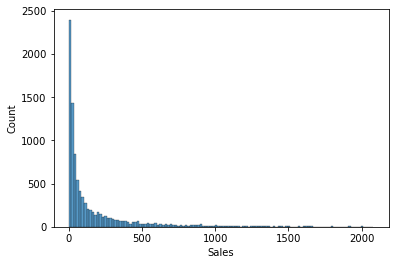

In [82]:
sns.histplot(dfz["Sales"], kde = False)

##  Still lot of outliers

<AxesSubplot:xlabel='Profit', ylabel='Count'>

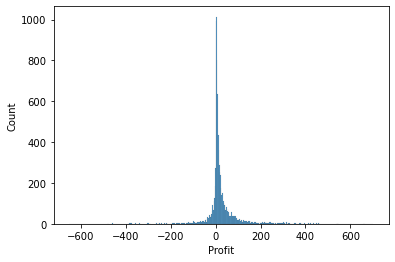

In [83]:
sns.histplot(dfz["Profit"], kde = False)

<AxesSubplot:xlabel='Sales'>

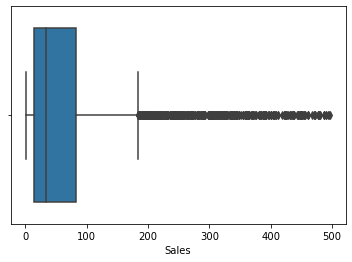

In [142]:
sns.boxplot(x = dfq["Sales"])   ### lets look at boxplot of the log of sales

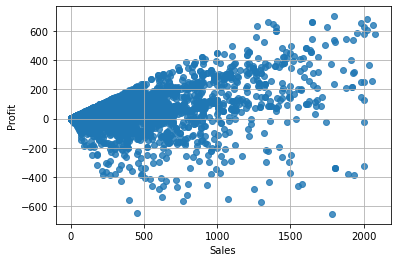

In [85]:
sns.regplot(x = dfz["Sales"], y = dfz["Profit"], fit_reg = False)

plt.grid()

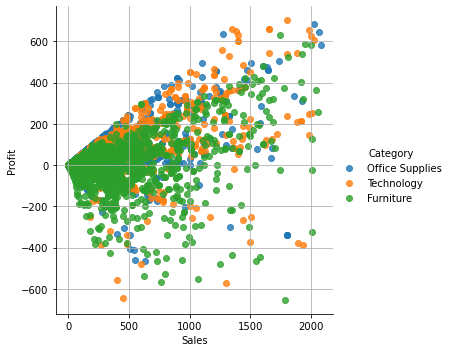

In [86]:
sns.lmplot(data = dfz, x = 'Sales', y = 'Profit', fit_reg = False, hue = "Category")

plt.grid()

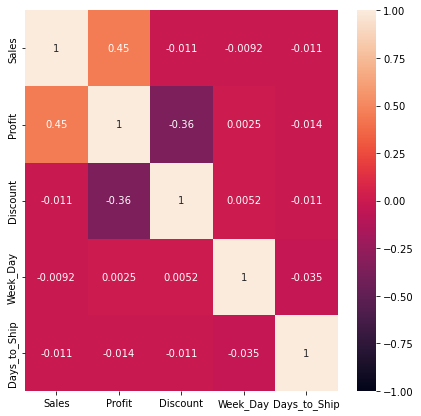

In [130]:
# show correlation of stats via heatmap
plt.figure(figsize=(7,7))

# calculate the correlation matrix for the numeric dataset 
corr = dfz[['Sales','Profit','Discount','Week_Day','Days_to_Ship']].corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)
plt.savefig('Heat.png',dpi=400)

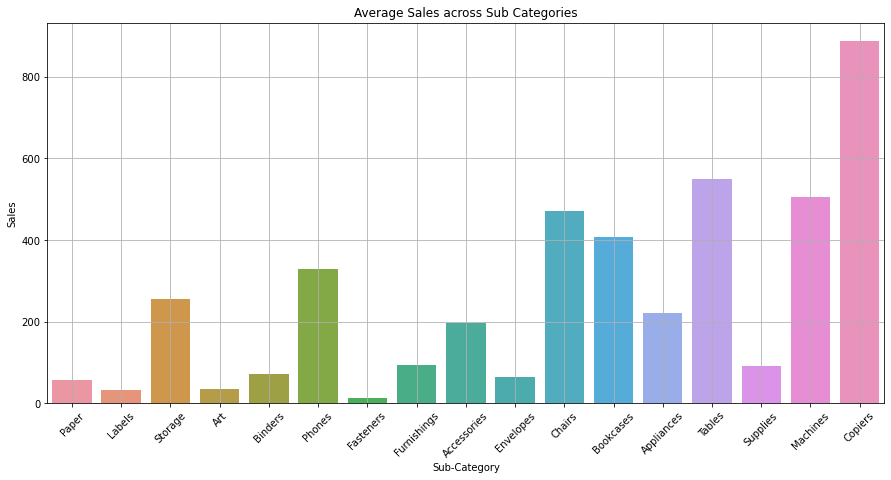

In [88]:
plt.figure(figsize=(15,7))

sns.barplot(data = dfz, x = "Sub-Category", y = "Sales", ci = None)

plt.xticks(rotation = 45)
plt.title('Average Sales across Sub Categories')
plt.grid()
plt.savefig('Ave.Sales.png',dpi=400)

Text(0.5, 1.0, 'Average Sales across Segment')

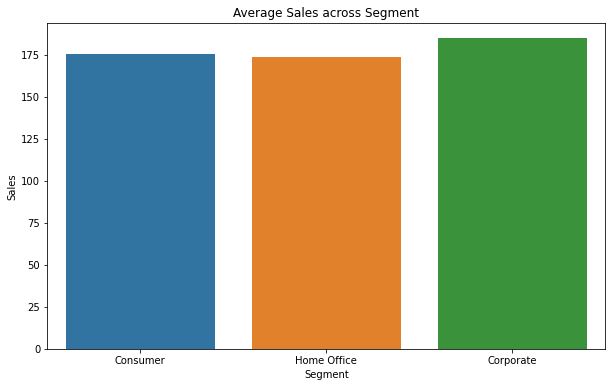

In [89]:
plt.figure(figsize=(10,6))

sns.barplot(data = dfz, x = "Segment", y = "Sales", ci = None)

plt.title('Average Sales across Segment')

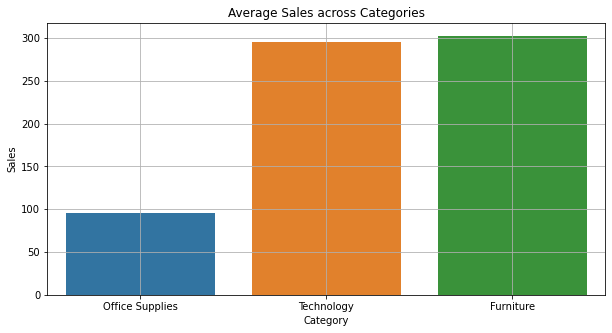

In [90]:
plt.figure(figsize=(10,5))

sns.barplot(data = dfz, x = "Category", y = "Sales", ci = None)

plt.title('Average Sales across Categories')
plt.grid()

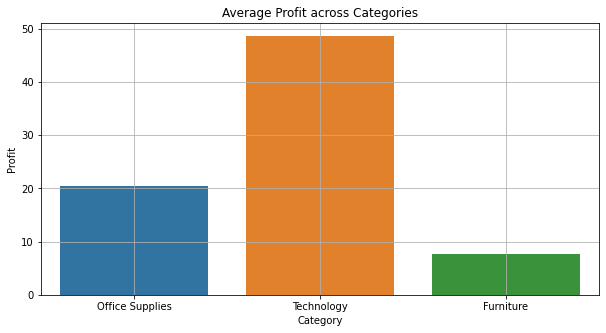

In [91]:
plt.figure(figsize=(10,5))

sns.barplot(data = dfz, x = "Category", y = "Profit", ci = None)

plt.title('Average Profit across Categories')
plt.grid()

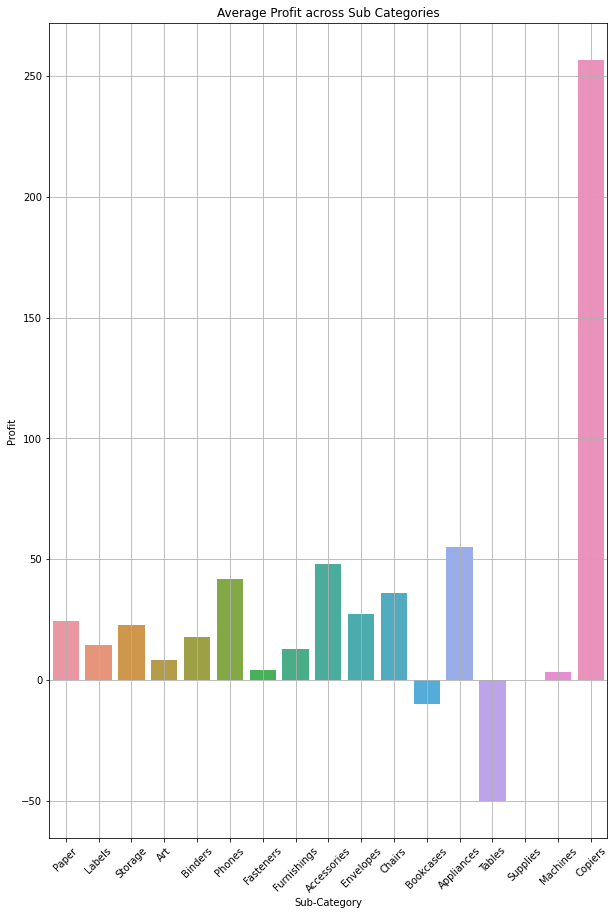

In [131]:
plt.figure(figsize=(10,15))

sns.barplot(data = dfz, x = "Sub-Category", y = "Profit", ci = None)

plt.xticks(rotation = 45)

plt.title('Average Profit across Sub Categories')
plt.grid()
plt.savefig('Avg.Profit.png',dpi=400)

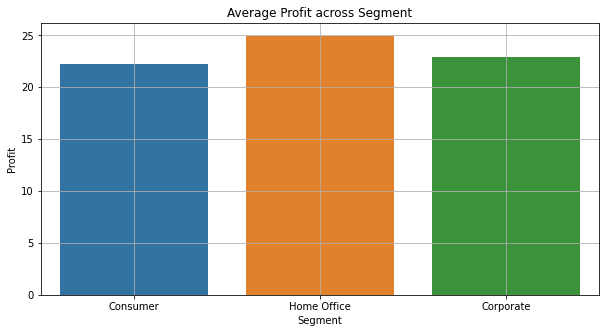

In [93]:
plt.figure(figsize=(10,5))

sns.barplot(data = dfz, x = "Segment", y = "Profit", ci = None)

plt.title('Average Profit across Segment')
plt.grid()

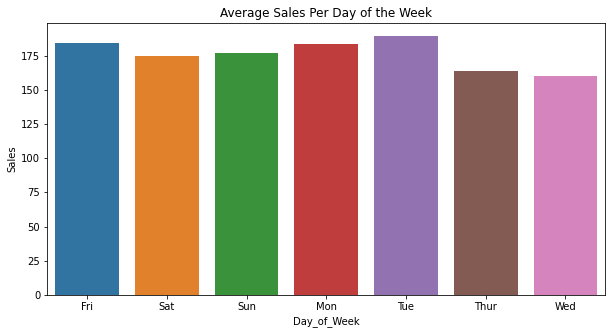

In [136]:
plt.figure(figsize=(10,5))

sns.barplot(data = dfz, x = "Day_of_Week", y = "Sales", ci = None)

plt.title('Average Sales Per Day of the Week')
plt.grid()

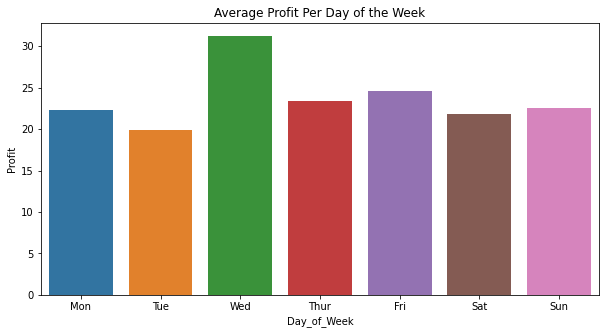

In [139]:
day_order = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]

plt.figure(figsize=(10,5))
sns.barplot(x = "Day_of_Week", y = "Profit", data = dfz, order = day_order, ci = None)

plt.title('Average Profit Per Day of the Week')
plt.savefig('Daily.Profit.png',dpi=400)


## Logical Regression modeling

Profitable
No     228.454727
Yes    167.776233
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Profitable', ylabel='Sales'>

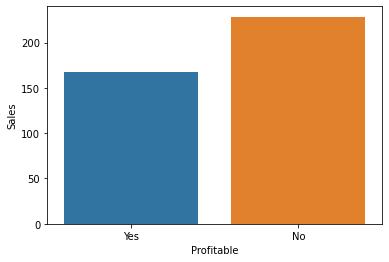

In [96]:
print(dfz["Sales"].groupby(dfz["Profitable"]).mean())

###

sns.barplot(data = dfz, x = "Profitable", y = "Sales", ci = None)

Profitable
0    0.406227
1    0.081060
Name: Discount, dtype: float64


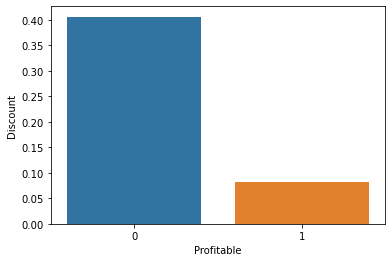

In [132]:
print(dfz["Discount"].groupby(dfz["Profitable"]).mean())

###

sns.barplot(data = dfz, x = "Profitable", y = "Discount", ci = None)

plt.savefig('Discount.png',dpi=400)

Profitable
No     3.635907
Yes    3.655489
Name: Quantity, dtype: float64


<AxesSubplot:xlabel='Profitable', ylabel='Quantity'>

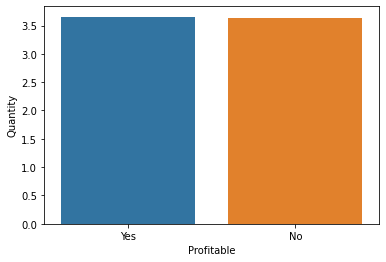

In [98]:
print(dfz["Quantity"].groupby(dfz["Profitable"]).mean())

###

sns.barplot(data = dfz, x = "Profitable", y = "Quantity", ci = None)

Profitable
No     3.954175
Yes    3.952059
Name: Days_to_Ship, dtype: float64


<AxesSubplot:xlabel='Profitable', ylabel='Days_to_Ship'>

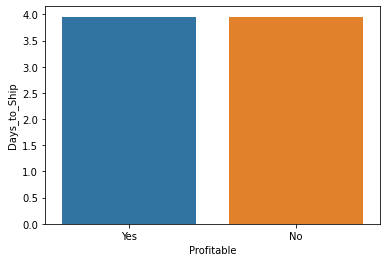

In [99]:
print(dfz["Days_to_Ship"].groupby(dfz["Profitable"]).mean())

###

sns.barplot(data = dfz, x = "Profitable", y = "Days_to_Ship", ci = None)

In [100]:
## Convert Profitable column to boolean 0 or 1

dfz['Profitable'] = np.where(dfz['Profitable'] == "Yes", 1, 0)
dfz.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Discount,Profit,Profitable,Week_Day,Days_to_Ship,Day_of_Week,zscore_sales,zscore_quantity,zscore_discount,zscore_profit
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,...,0.2,5.5512,1,4,4,Fri,0.342435,0.804303,0.212153,0.098638
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,0.2,4.2717,1,5,4,Sat,0.349918,0.354865,0.212153,0.104100
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,0.2,-64.7748,0,5,4,Sat,0.068801,0.354865,0.212153,0.398857
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,...,0.2,4.8840,1,6,7,Sun,0.337480,0.354865,0.212153,0.101486
5,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,Henderson,Kentucky,42420,...,0.0,1.4796,1,0,4,Mon,0.360034,0.804303,0.756643,0.116019


In [101]:
## creat logical regression model

mod1 = sm.logit('Profitable ~ Sales + Quantity + Discount + Week_Day + Postal_Code', data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.200500
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Profitable   No. Observations:                 9436
Model:                          Logit   Df Residuals:                     9430
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.5584
Time:                        19:26:17   Log-Likelihood:                -1891.9
converged:                       True   LL-Null:                       -4284.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.9832      0.227     26.317      0.000       5.538       6.429
Sales          -0.0010      0.000     -7.805      0.000      -0.001      -0.001
Quantity        0.0718      0.023      3.166      0.002       0.027       0.116
Discount      -22.1501      0.850    -26.060      0.000     -23.816     -20.484
Week_Day       -0.0101      0.020     -0.512      0.609      -0.049       0.029
Postal_Code  1.695e-07   1.44e-06      0.118      0.906   -2.65e-06    2.99e-06
===============================================================================
"""

In [102]:
mod1 = sm.logit('Profitable ~ Sales + Quantity + Discount', data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.200515
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Profitable   No. Observations:                 9436
Model:                          Logit   Df Residuals:                     9432
Method:                           MLE   Df Model:                            3
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.5583
Time:                        19:26:17   Log-Likelihood:                -1892.1
converged:                       True   LL-Null:                       -4284.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9604      0.196     30.480      0.000       5.577       6.344
Sales         -0.0010      0.000     -7.827      0.000      -0.001      -0.001
Quantity       0.0716      0.023      3.162      0.002       0.027       0.116
Discount     -22.1489      0.848    -26.125      0.000     -23.810     -20.487
==============================================================================
"""

In [103]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9436 non-null   object        
 1   Order_Date       9436 non-null   datetime64[ns]
 2   Ship_Date        9436 non-null   datetime64[ns]
 3   Ship_Mode        9436 non-null   object        
 4   Customer_ID      9436 non-null   object        
 5   Customer_Name    9436 non-null   object        
 6   Segment          9436 non-null   object        
 7   City             9436 non-null   object        
 8   State            9436 non-null   object        
 9   Postal_Code      9436 non-null   int64         
 10  Region           9436 non-null   object        
 11  Product_ID       9436 non-null   object        
 12  Category         9436 non-null   object        
 13  Sub-Category     9436 non-null   object        
 14  Product_Name     9436 non-null   object 

In [104]:
dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,3.877784e+02,4.839239e-204,Sig
Sales,9.990114e-01,4.986231e-15,Sig
Quantity,1.074262e+00,1.568705e-03,Sig
Discount,2.403657e-10,1.874866e-150,Sig


In [105]:
dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,3.877784e+02,4.839239e-204,Sig,38677.835879
Sales,9.990114e-01,4.986231e-15,Sig,-0.098862
Quantity,1.074262e+00,1.568705e-03,Sig,7.426236
Discount,2.403657e-10,1.874866e-150,Sig,-100.000000


In [106]:
df[['Sales','Quantity','Discount']].describe()

,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203
std,623.245101,2.225110,0.206452
min,0.444000,1.000000,0.000000
25%,17.280000,2.000000,0.000000
50%,54.490000,3.000000,0.200000
75%,209.940000,5.000000,0.200000
max,22638.480000,14.000000,0.800000


In [107]:
mod1.predict({
    'Sales': 65.24, 
    'Quantity': 2, 
    'Discount': .1})

0    0.978633
dtype: float64

In [108]:
mod1.predict({
    'Sales': 65.24, 
    'Quantity': 2, 
    'Discount': .3})

0    0.35309
dtype: float64

## If we increase the dicount we will most likely not be profitable. Discount has the largest effect on profitability

In [109]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [110]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9436 non-null   object        
 1   Order_Date       9436 non-null   datetime64[ns]
 2   Ship_Date        9436 non-null   datetime64[ns]
 3   Ship_Mode        9436 non-null   object        
 4   Customer_ID      9436 non-null   object        
 5   Customer_Name    9436 non-null   object        
 6   Segment          9436 non-null   object        
 7   City             9436 non-null   object        
 8   State            9436 non-null   object        
 9   Postal_Code      9436 non-null   int64         
 10  Region           9436 non-null   object        
 11  Product_ID       9436 non-null   object        
 12  Category         9436 non-null   object        
 13  Sub-Category     9436 non-null   object        
 14  Product_Name     9436 non-null   object 

In [111]:
dfz_model = dfz[['Sales', 'Profit', 'Discount', 'Quantity',  'Week_Day', 'Days_to_Ship', 'Profitable']].copy()
dfz_model.head()

,Sales,Profit,Discount,Quantity,Week_Day,Days_to_Ship,Profitable
0,16.448,5.5512,0.2,2,4,4,1
1,11.784,4.2717,0.2,3,5,4,1
2,272.736,-64.7748,0.2,3,5,4,0
4,19.536,4.8840,0.2,3,6,7,1
5,5.480,1.4796,0.0,2,0,4,1


In [112]:
dfz_model.corr()

,Sales,Profit,Discount,Quantity,Week_Day,Days_to_Ship,Profitable
Sales,1.000000,0.449825,-0.010596,0.253133,-0.009150,-0.010652,-0.077632
Profit,0.449825,1.000000,-0.359596,0.119362,0.002465,-0.014287,0.413569
Discount,-0.010596,-0.359596,1.000000,0.003517,0.005162,-0.011000,-0.697514
Quantity,0.253133,0.119362,0.003517,1.000000,-0.000259,0.014815,0.003650
Week_Day,-0.009150,0.002465,0.005162,-0.000259,1.000000,-0.034547,-0.003521
Days_to_Ship,-0.010652,-0.014287,-0.011000,0.014815,-0.034547,1.000000,-0.000453
Profitable,-0.077632,0.413569,-0.697514,0.003650,-0.003521,-0.000453,1.000000


In [113]:
dfz_model.drop('Profit', axis = 1, inplace = True)

In [114]:
X = dfz_model.drop('Profitable', axis = 1)

Y = dfz_model['Profitable']

In [115]:
X

,Sales,Discount,Quantity,Week_Day,Days_to_Ship
0,16.448,0.2,2,4,4
1,11.784,0.2,3,5,4
2,272.736,0.2,3,5,4
4,19.536,0.2,3,6,7
5,5.480,0.0,2,0,4
...,...,...,...,...,...
9989,3.024,0.2,3,5,4
9990,52.776,0.2,3,5,4
9991,90.930,0.0,7,5,4
9992,13.904,0.2,2,5,4


In [116]:
Y

0       1
1       1
2       0
4       1
5       1
       ..
9989    0
9990    1
9991    1
9992    1
9993    1
Name: Profitable, Length: 9436, dtype: int32

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=109)

In [118]:
gnb = GaussianNB()

In [119]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [120]:
gnb.score(X_train, Y_train)

0.9242616928076869

In [121]:
Y_pred = gnb.predict(X_test)

In [122]:
cm = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred),
    columns=['Predicted Not Profitable', 'Predicted Profitable'],
    index=['True Not Profitable', 'True Profitable']
)

cm

,Predicted Not Profitable,Predicted Profitable
True Not Profitable,217,146
True Profitable,9,1987


In [123]:
#frequency of profitable orders to non profitable orders in test dataset

Y_test.value_counts()

1    1996
0     363
Name: Profitable, dtype: int64

In [124]:
gnb.score(X_test, Y_test)

0.9342941924544298

In [125]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       363
           1       0.93      1.00      0.96      1996

    accuracy                           0.93      2359
   macro avg       0.95      0.80      0.85      2359
weighted avg       0.94      0.93      0.93      2359



In [126]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9436 non-null   object        
 1   Order_Date       9436 non-null   datetime64[ns]
 2   Ship_Date        9436 non-null   datetime64[ns]
 3   Ship_Mode        9436 non-null   object        
 4   Customer_ID      9436 non-null   object        
 5   Customer_Name    9436 non-null   object        
 6   Segment          9436 non-null   object        
 7   City             9436 non-null   object        
 8   State            9436 non-null   object        
 9   Postal_Code      9436 non-null   int64         
 10  Region           9436 non-null   object        
 11  Product_ID       9436 non-null   object        
 12  Category         9436 non-null   object        
 13  Sub-Category     9436 non-null   object        
 14  Product_Name     9436 non-null   object 

In [127]:
### remove z_scores
dfz.drop(['zscore_sales', 'zscore_quantity', 'zscore_discount', 'zscore_profit'], axis = 1, inplace = True)

dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9436 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9436 non-null   object        
 1   Order_Date     9436 non-null   datetime64[ns]
 2   Ship_Date      9436 non-null   datetime64[ns]
 3   Ship_Mode      9436 non-null   object        
 4   Customer_ID    9436 non-null   object        
 5   Customer_Name  9436 non-null   object        
 6   Segment        9436 non-null   object        
 7   City           9436 non-null   object        
 8   State          9436 non-null   object        
 9   Postal_Code    9436 non-null   int64         
 10  Region         9436 non-null   object        
 11  Product_ID     9436 non-null   object        
 12  Category       9436 non-null   object        
 13  Sub-Category   9436 non-null   object        
 14  Product_Name   9436 non-null   object        
 15  Sales          9436 n

In [128]:
dfz.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Profitable,Week_Day,Days_to_Ship,Day_of_Week
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,...,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,1,4,4,Fri
1,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Labels,Avery 508,11.784,3,0.2,4.2717,1,5,4,Sat
2,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,0,5,4,Sat
4,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,...,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,1,6,7,Sun
5,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,Henderson,Kentucky,42420,...,Art,Rogers Handheld Barrel Pencil Sharpener,5.480,2,0.0,1.4796,1,0,4,Mon


In [129]:
### export the z_score ouliers removed dataset to excel

dfz.to_excel("Superstore_modified.xlsx", index = False)